In [12]:
import numpy as np
import matplotlib.pyplot as plt
from yolov7_package import Yolov7Detector
import matplotlib.patches as patches
import time

from robot_utils.robot_data.img_data import ImgData
from robot_utils.robot_data.pose_data import PoseData
from robot_utils.transform import transform

import sys
sys.path.append("/home/masonbp/code/")

from segment_track.fastsam_wrapper import FastSAMWrapper

In [10]:
bag = "/home/masonbp/data/motlee_jan_2024/00/RR08.bag"
t0 = ImgData.topic_t0(bag, "/RR08/d455/color/image_raw/compressed")

img_data = ImgData(
    data_file=bag,
    file_type='bag',
    topic="/RR08/d455/color/image_raw/compressed",
    time_tol=.05,
    time_range=[t0, t0+5],
    t0=0.0
)

In [16]:
def run_test(imgs, imgsz, device):
    fastsam = FastSAMWrapper(
        weights="/home/masonbp/tools/fastsam/weights/FastSAM-x.pt",
        imgsz=imgsz,
        device=device
    )

    ts = []
    for img in imgs:
        t_wc = time.time()
        fastsam.run(0, 0, img)
        ts.append(time.time() - t_wc)
    return ts

In [25]:
imgsz = 256, 512, 1024
imgs = [img_data.img(t) for t in np.linspace(0, 5, 20)]

cuda_tests = []
cpu_tests = []

for sz in imgsz:
    cuda_tests.append(run_test(imgs, sz, "cuda"))
    cpu_tests.append(run_test(imgs, sz, "cpu"))


0: 160x256 2 objects, 13.0ms
Speed: 0.7ms preprocess, 13.0ms inference, 4.3ms postprocess per image at shape (1, 3, 256, 256)

0: 160x256 2 objects, 12.5ms
Speed: 0.4ms preprocess, 12.5ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 256)

0: 160x256 2 objects, 12.5ms
Speed: 0.4ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

0: 160x256 2 objects, 11.9ms
Speed: 0.4ms preprocess, 11.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

0: 160x256 2 objects, 13.8ms
Speed: 0.7ms preprocess, 13.8ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 256)

0: 160x256 2 objects, 11.6ms
Speed: 0.4ms preprocess, 11.6ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)

0: 160x256 2 objects, 12.3ms
Speed: 0.6ms preprocess, 12.3ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 256)

0: 160x256 2 objects, 12.6ms
Speed: 0.4ms preprocess, 12.6ms inference, 2.2ms postprocess per image at shape (

Text(0.5, 0, 'Image size')

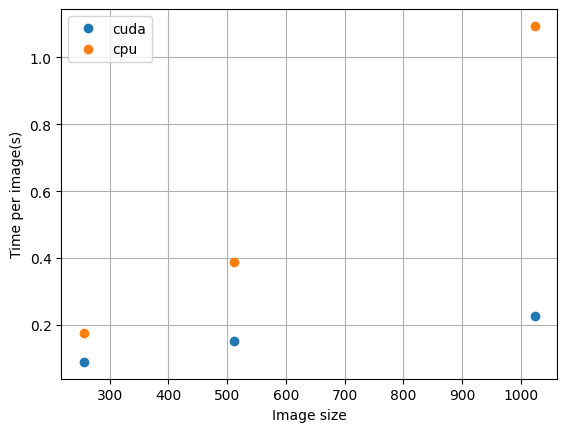

In [28]:
plt.plot(imgsz, np.mean(cuda_tests, axis=1), label="cuda", marker='o', linestyle='')
plt.plot(imgsz, np.mean(cpu_tests, axis=1), label="cpu", marker='o', linestyle='')
plt.legend()
plt.grid(True)
plt.ylabel("Time per image(s)")
plt.xlabel("Image size")